In [910]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [911]:
df = pd.read_csv(r"C:\Users\memeo\Documents\Project\adult_dataset.csv")

# Data Exploration and Preprocessing

In [912]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [914]:
df.replace('?',np.NaN,inplace=True)

Replace '?' with NaN so dropna() can remove the rows

In [915]:
print(df.isnull().sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64


In [916]:
df = df.dropna(axis=0)

In [917]:
df['income'].value_counts()

income
<=50K     22654
<=50K.    11360
>50K       7508
>50K.      3700
Name: count, dtype: int64

In [918]:
df['income'] = df['income'].str.replace('>50.', '>50', regex=True)
df['income'] = df['income'].str.replace('>50.', '>50', regex=True)
df['income'] = df['income'].str.replace('<=50.', '<=50', regex=True)
df['income'] = df['income'].str.replace('<=50.', '<=50', regex=True)
df['income'].value_counts()

income
<=50    34014
>50     11208
Name: count, dtype: int64

Replace '>50.' and '<=50.' with the correct verisons

In [919]:
df = df.drop(["education"], axis=1)

2 Versions of education. For our model we are using education-num

<Axes: xlabel='age', ylabel='Density'>

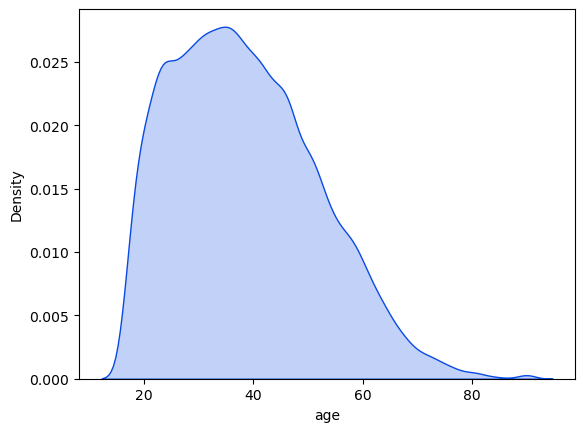

In [920]:
sns.kdeplot(data=df, x ='age', color='#094ae3', fill = True)

C:\Users\memeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(0.0, 17.0)

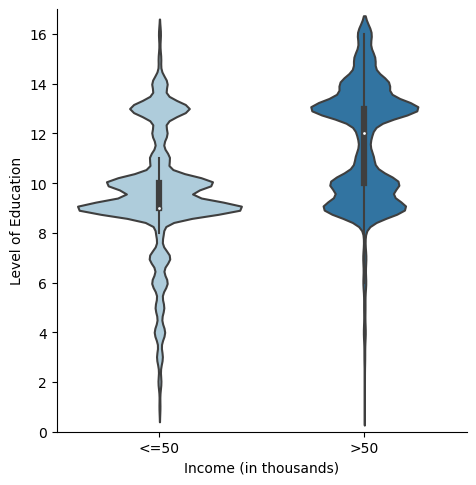

In [921]:
sns.catplot(data=df, x="income", y="education-num", kind="violin", bw_adjust=.5, palette = 'Paired')
plt.ylabel("Level of Education")
plt.xlabel("Income (in thousands)")
plt.ylim(0, 17)

C:\Users\memeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Income (in thousands)')

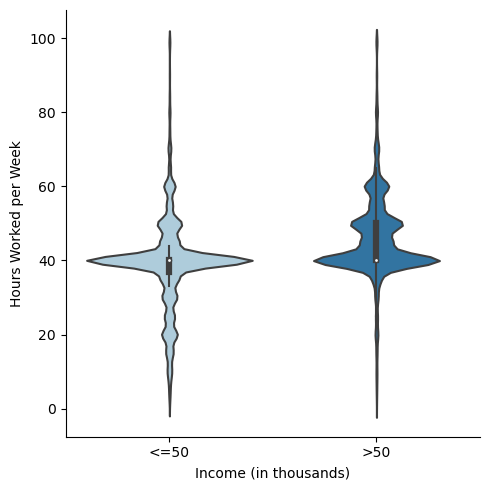

In [922]:
sns.catplot(data=df, x="income", y="hours-per-week", kind="violin", palette = 'Paired')
plt.ylabel("Hours Worked per Week")
plt.xlabel("Income (in thousands)")

C:\Users\memeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 9.444444444444438, 'Income (in thousands)')

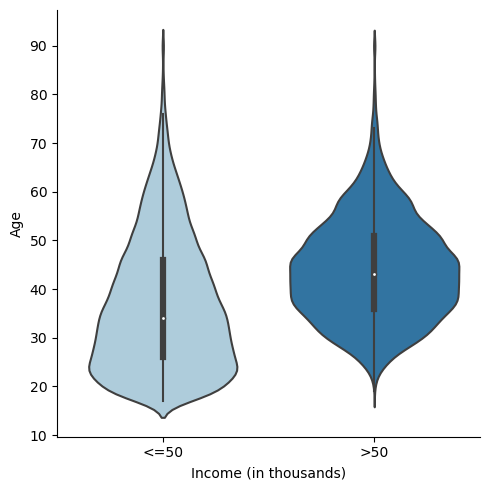

In [923]:
sns.catplot(data=df, x="income", y="age", kind="violin", palette = 'Paired')
plt.ylabel("Age")
plt.xlabel("Income (in thousands)")

C:\Users\memeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


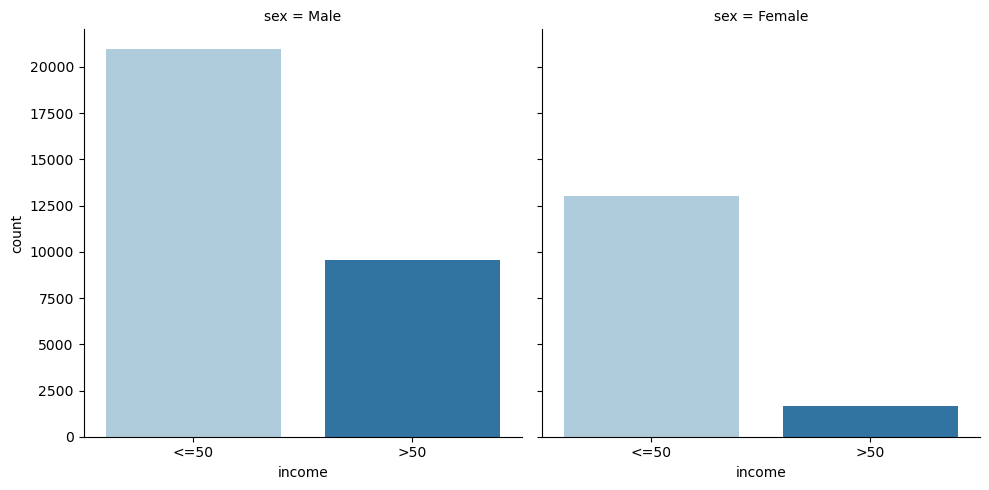

In [924]:
sns.catplot(data=df, x="income", col="sex", kind="count", palette = 'Paired')

C:\Users\memeo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


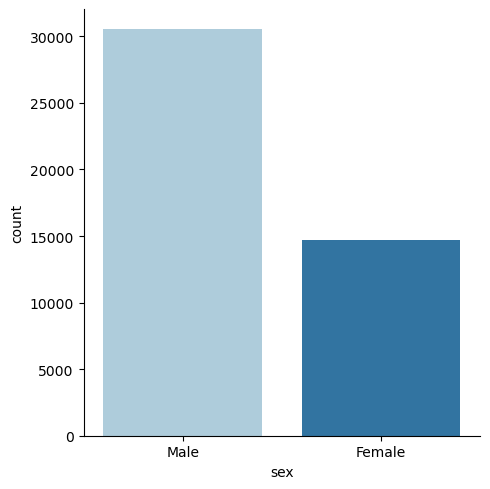

In [925]:
sns.catplot(data=df, x="sex", kind="count", palette = 'Paired')

In [926]:
df["income"] = df["income"].map({">50":1, "<=50":0})

df.drop(["workclass","occupation","relationship", "native-country", "marital-status", "fnlwgt"], axis = 1, inplace = True)

df

,age,education-num,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,White,Male,2174,0,40,0
1,50,13,White,Male,0,0,13,0
2,38,9,White,Male,0,0,40,0
3,53,7,Black,Male,0,0,40,0
4,28,13,Black,Female,0,0,40,0
...,...,...,...,...,...,...,...,...
48836,33,13,White,Male,0,0,40,0
48837,39,13,White,Female,0,0,36,0
48839,38,13,White,Male,0,0,50,0
48840,44,13,Asian-Pac-Islander,Male,5455,0,40,0


Dropping uneeded variables and converting income into numbers for the model and heatmaps. 

In [927]:
X = df.drop(['income'], axis = 1)
y = df['income']

Creation of Targest and predictors 

In [928]:
X = pd.get_dummies(X, drop_first=True, dtype=float)
X.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,39,13,2174,0,40,0.0,0.0,0.0,1.0,1.0
1,50,13,0,0,13,0.0,0.0,0.0,1.0,1.0
2,38,9,0,0,40,0.0,0.0,0.0,1.0,1.0


Encoding race and sex for model

In [929]:
label_encoder = LabelEncoder()
df['race'] = label_encoder.fit_transform(df['race'])
df['sex'] = label_encoder.fit_transform(df['sex'])

Encoding race and sex for Heatmap

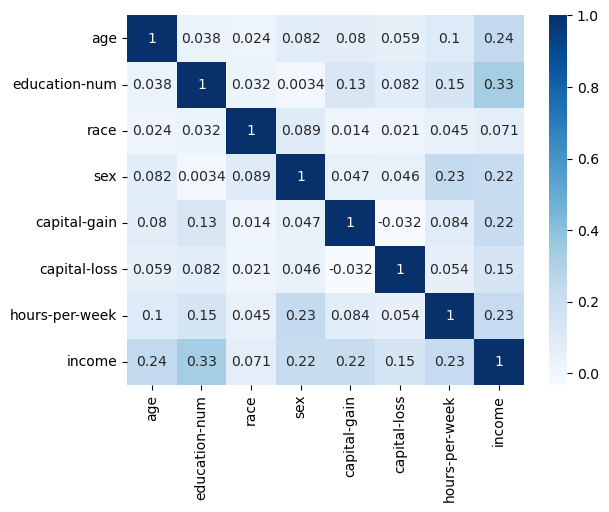

In [930]:
heatmap = sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Model Building

In [931]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train test split using 80/20 train test

In [932]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Scale predictors train and test data

# KNN Model

In [933]:
knn = KNeighborsClassifier(n_neighbors=376)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.812824765063571
Precision: 0.7325670498084291
Recall: 0.4156521739130435
F1-Score: 0.530374479889043


In [934]:
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.88      6745
        >50K       0.73      0.42      0.53      2300

    accuracy                           0.81      9045
   macro avg       0.78      0.68      0.71      9045
weighted avg       0.80      0.81      0.79      9045



In [935]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6396,  349],
       [1344,  956]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

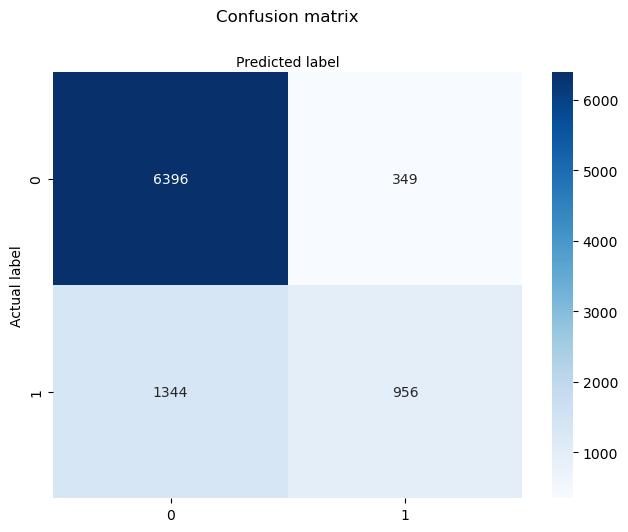

In [936]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Log Reg (The model we ended up using)

In [937]:
logreg = LogisticRegression(solver='liblinear', penalty='l1', fit_intercept=True, intercept_scaling=.01)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8189054726368159
Precision: 0.7350852272727273
Recall: 0.45
F1-Score: 0.5582524271844661


The overall profornace is okay the Accuracy and Precision are both good, however the Recall and F1-Score are not the best.

In [938]:
coefficients = logreg.coef_
intercept = logreg.intercept_

print("Model Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Model Coefficients:
[[0.5523849  0.82553069 2.39560084 0.26262961 0.37230002 0.1137304
  0.08046591 0.02514258 0.2489301  0.53175269]]

Intercept: [-1.34492084]


Age: A log odds ratio of 0.55625378 which is an odds ratio of 1.744 which means that for every one-unit increase in age, the odds of making >50K increase by a factor of 1.744. This indicates a positive relationship between age and income.

Education-num: A log odds ratio of 0.82347103 which is an odds ratio of 2.278 which means that for every one-unit increase in education, the odds of making >50K increase by a factor of  2.278. This indicates a significant positive relationship between Education and income. 


Capital-gain:  A log odds ratio of 2.3311826 which is an odds ratio of 1.308 which means that for every one-unit increase in Capital-gain, the odds of making >50K increase by a factor of 10.290. This indicates a strong positive relationship between Capital-gain and the likelihood of making a purchase.

Capital-loss: An odds ratio of 0.26851997 which is an odds ratio of 1.308 which means that for every one-unit increase in Capital-loss, the odds of making >50K increase by a factor of 1.308. This indicates a positive relationship between Capital-loss:and income.

Hours-per-week: An odds ratio of 0.37535176 which is an odds ratio of 1.455 means that for each one-unit increase in Hours-per-week, the odds of making >50K increase by a factor of 1.455. This indicates a positive relationship between Hours-per-week and income, so the more hours a person works, the more likely they are to be making more than 50k.

race_Asian-Pac-Islander: An odds ratio of 0.14331309 which is an odds ratio of 1.154 means that for being an Asian/Pacific Islander,  the odds of making >50K increase by a factor of 1.154.

race_Black: An odds ratio of 0.12105626 which is an odds ratio of 1.128 means that for being Black,  the odds of making >50K increase by a factor of 1.128.
race_Other: An odds ratio of 0.03856677 which is an odds ratio of 1.039 means that for being a low population race,  the odds of making >50K increase by a factor of 1.039.
race_White: An odds ratio of 0.30261003 which is an odds ratio of 1.353 means that for being White,  the odds of making >50K increase by a factor of 1.353. The most likely race to be making >50K in income.

sex_Male: An odds ratio of 0.53155045 which is an odds ratio of 1.701 means that for each being an Asian/Pacific Islander,  the odds of making >50K increase by a factor of 1.701. This indicates a positive relationship between age and income.


In [939]:
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

       <=50K       0.83      0.94      0.89      6745
        >50K       0.74      0.45      0.56      2300

    accuracy                           0.82      9045
   macro avg       0.78      0.70      0.72      9045
weighted avg       0.81      0.82      0.80      9045



In [940]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[6372,  373],
       [1265, 1035]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

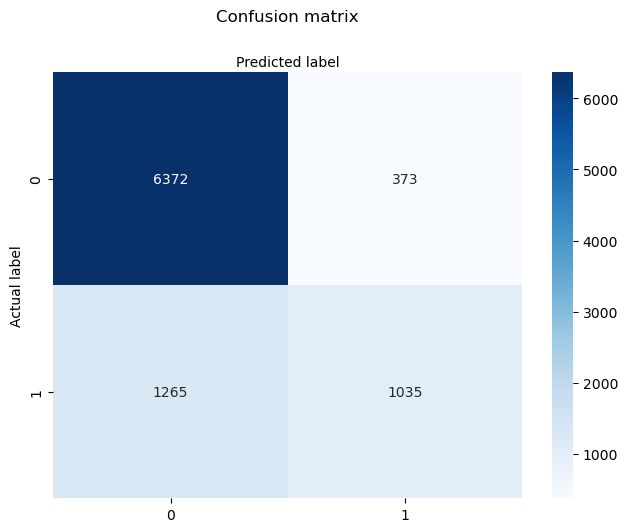

In [941]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC AUC Scores

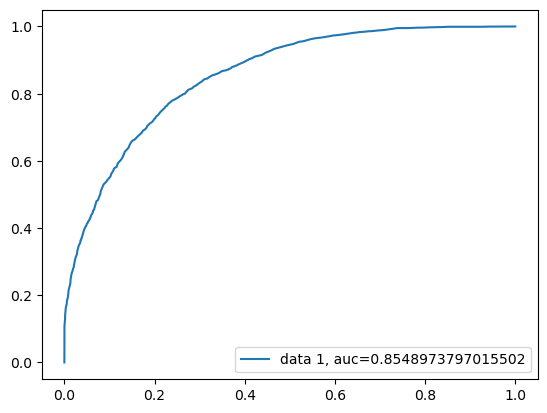

In [942]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

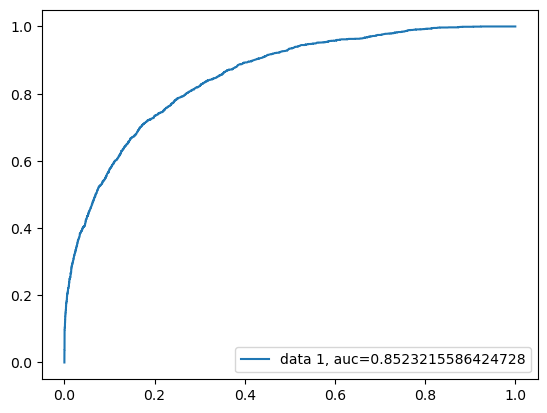

In [943]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()